# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 


SOLUTION:

From the data exploration,We can see that their is need for data cleaning,treating missing values, inconsistency in birth_mont and state(some columns are entries are abbreviated while others are in full).

RECOMMENDATION:
1. Since the data is categorical, columns with missing Values should be drop using the 'dropna()' function.
2. To address the Inconsistency in naming some entries in Birth_month and State Column, a consistent entry should be adopted 
3. To avoid redundancy, duplicate columns should be dropped
4. After all the data cleaning, a new plots figure should be plotted. 

In [23]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# reading the dataset
df = pd.read_csv('Form.csv')
df

,Birth_month,State,Pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,Callifornia,Cats
6,April,CA,Dog
7,January,Callifornia,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [25]:
#Dropping the column with Misssing Value
df = df.dropna()
df.head()


,Birth_month,State,Pet
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,Callifornia,Cats


In [26]:
df['Birth_month'].value_counts()


Birth_month
January      2
JAN          1
Sept         1
July         1
September    1
April        1
November     1
December     1
Name: count, dtype: int64

In [27]:
#Correcting the month column to full name, so as to have consistency in the data.
month_mapping = {
    'JAN': 'January',
    'Sept': 'September',
    'january': 'January'}

In [28]:
#Replacing the month column with the corrected column 
df.loc[:,'Birth_month']=df['Birth_month'].replace(month_mapping)
df['Birth_month'].value_counts()


Birth_month
September    2
January      2
January      1
July         1
April        1
November     1
December     1
Name: count, dtype: int64

In [29]:
df['State'].value_counts()

State
CA             2
Callifornia    2
Hawaii         1
AK             1
RI             1
FL             1
Florida        1
Name: count, dtype: int64

In [30]:
df.loc[:,'State']=df['State'].str.strip().str.title()
#Correcting the State column to full name, so as to have consistency in the data.
state_mapping = {
    'Hawaii': 'HI',
    'Florida': 'FL',
    'Callifornia':'CA'}

#Replacing the month column with the corrected column 
df.loc[:,'State']=df['State'].replace(state_mapping)
df['State'].value_counts()
df

,Birth_month,State,Pet
1,January,Ca,Cats
2,September,HI,Dog
3,January,Ak,Dog
4,July,Ri,Cats
5,September,CA,Cats
6,April,Ca,Dog
7,January,CA,Cats
8,November,Fl,Dog
9,December,FL,Cats


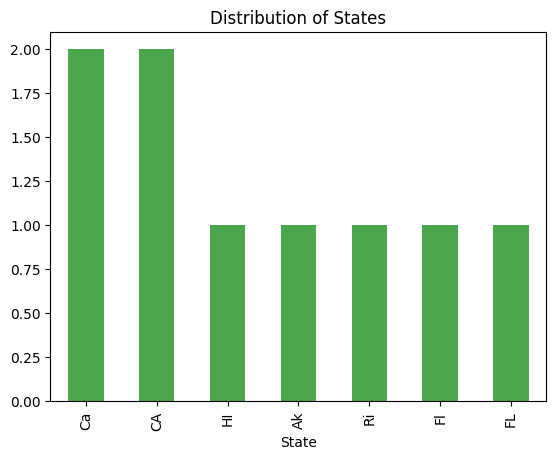

In [31]:
df['State'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of States')
plt.show()

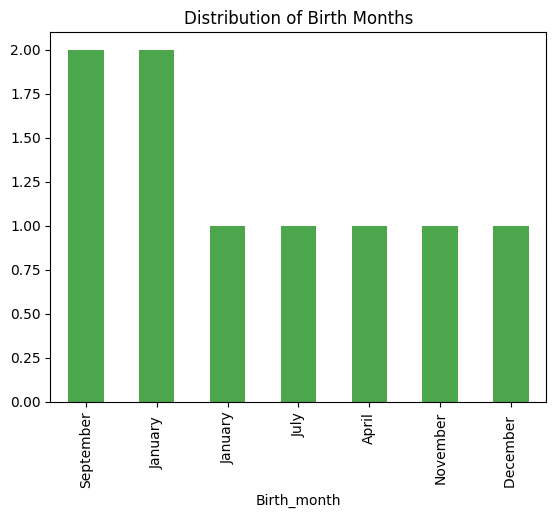

In [32]:
df['Birth_month'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Birth Months')
plt.show()